# 0. Check Running Eviroment

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("Number GPUs Avalable: ", 
      len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.config.experimental.list_physical_devices('GPU'))
print(device_lib.list_local_devices())

Number GPUs Avalable:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10400375527534829292
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14343274496
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17528536475132310010
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


# 1. Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2. Read Datasets from GDrive

In [ ]:
data_dir = '/content/gdrive/MyDrive/Computer_Vision/Code/flowers'
width = 224
height = 224
batchSize = 32

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_ds = image_dataset_from_directory(
    data_dir+"/train",
    validation_split = 0.2,
    subset = 'training',
    seed = 12,
    image_size = (width, height),
    batch_size = batchSize,
    label_mode = 'categorical'
)

validation_ds = image_dataset_from_directory(
    data_dir+"/train",
    validation_split = 0.2,
    subset = 'validation',
    seed = 12,
    image_size = (width, height),
    batch_size = batchSize,
    label_mode = 'categorical'
)

Found 4318 files belonging to 5 classes.
Using 3455 files for training.
Found 4318 files belonging to 5 classes.
Using 863 files for validation.


In [ ]:
classNames = train_ds.class_names
print(classNames)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


# 3. Building Model

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Recall, Precision

def AlexnetModel(input_shape, num_classes):

  # Input Layer
  input = Input(shape = input_shape)

  # Layer 1
  x = Conv2D(96, (11, 11), strides = 4, padding='same')(input)
  x = Activation('relu')(x)
  x = MaxPooling2D((3,3), strides = 2)(x)

  # layer 2
  x = Conv2D(256, (5, 5), strides = 2, padding='same')(x)
  x = Activation('relu')(x)
  x = MaxPooling2D((3,3), strides = 2)(x)

  # layer 3
  x = Conv2D(384, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)

  # layer 4
  x = Conv2D(384, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)

  # layer 5
  x = Conv2D(256, (3, 3), strides = 1, padding='same')(x)
  x = Activation('relu')(x)
  x = MaxPooling2D((3,3), strides = 2)(x)

  # Flatten
  x = Flatten()(x)

  # Fully Connected Layer 1
  x = Dense(4096)(x)
  x = Activation('relu')(x)
  x = Dropout(0.5)(x)

  # Fully Connected Layer 2
  x = Dense(4096)(x)
  x = Activation('relu')(x)
  x = Dropout(0.5)(x)

  # Output Layer
  x = Dense(num_classes, activation = 'softmax')(x)

  # Compile the model
  model = Model(inputs = input, outputs = x)
  model.compile(
      optimizer = 'adam',
      loss = 'categorical_crossentropy',
      metrics = ['accuracy', Recall(), Precision()]
  )

  return model

In [ ]:
myModel = AlexnetModel(input_shape = [width, height, 3], num_classes = len(classNames))
myModel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 14, 14, 256)       0         
                                                             

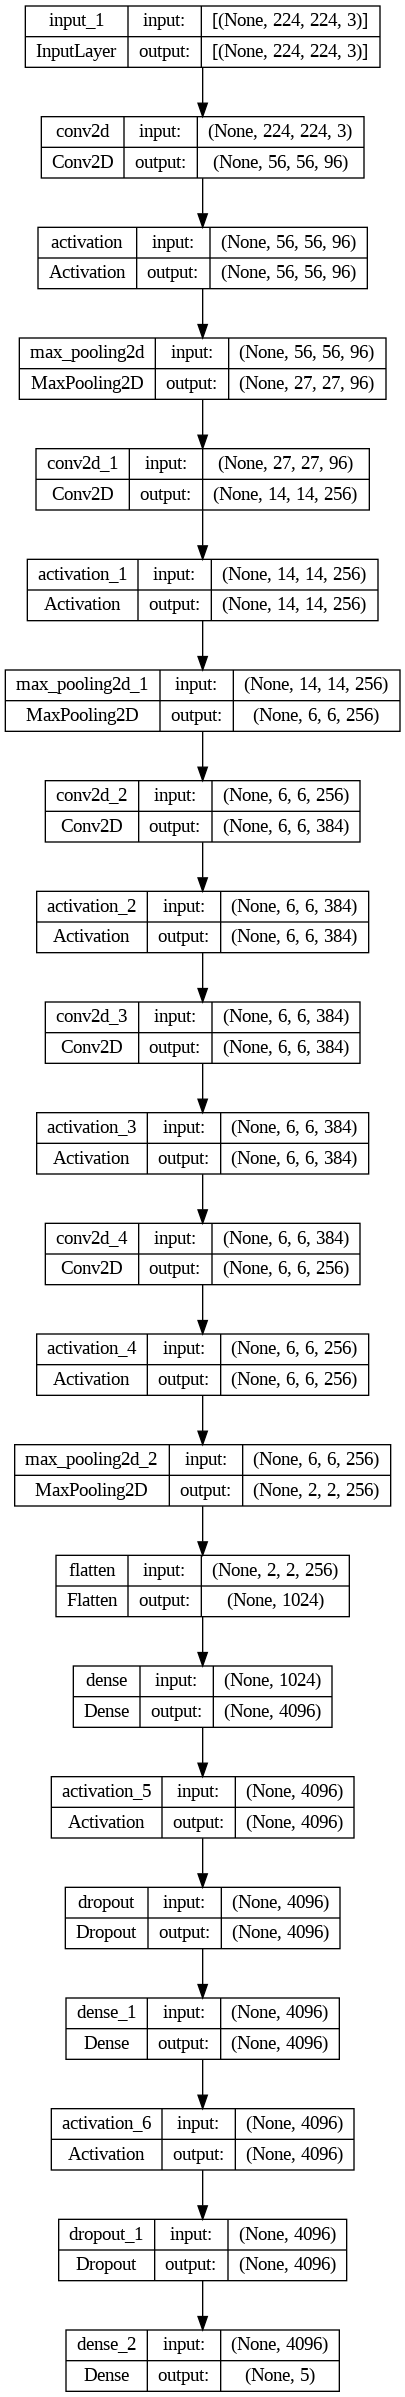

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(myModel, to_file='My Model.png', show_shapes=True)

# 4. Training Model

In [ ]:
from datetime import datetime

start_time = datetime.now()

history = myModel.fit(
    train_ds,
    batch_size = batchSize,
    epochs = 10,
    validation_data = validation_ds,
    verbose = 1
)

end_time = datetime.now()

myModel.save('/content/gdrive/MyDrive/Computer_Vision/Code/modelCNN.h5')

Epoch 1/10
108/108 [==============================] - 15s 129ms/step - loss: 1.1646 - accuracy: 0.5155 - recall: 0.3172 - precision: 0.6217 - val_loss: 1.2379 - val_accuracy: 0.4623 - val_recall: 0.3163 - val_precision: 0.5688
Epoch 2/10
108/108 [==============================] - 14s 123ms/step - loss: 1.1526 - accuracy: 0.5143 - recall: 0.3233 - precision: 0.6416 - val_loss: 1.1850 - val_accuracy: 0.5006 - val_recall: 0.3685 - val_precision: 0.6000
Epoch 3/10
108/108 [==============================] - 14s 125ms/step - loss: 1.1394 - accuracy: 0.5245 - recall: 0.3479 - precision: 0.6404 - val_loss: 1.2411 - val_accuracy: 0.4832 - val_recall: 0.3210 - val_precision: 0.5957
Epoch 4/10
108/108 [==============================] - 14s 128ms/step - loss: 1.1074 - accuracy: 0.5357 - recall: 0.3606 - precision: 0.6490 - val_loss: 1.2629 - val_accuracy: 0.4635 - val_recall: 0.3465 - val_precision: 0.5783
Epoch 5/10
108/108 [==============================] - 14s 129ms/step - loss: 1.0887 - accura

# 5. Evaluation

In [ ]:
# Average
import numpy as np

print("Duration: "+str(end_time - start_time))
print("\nTraining Evaluation")
print("Average loss: ", np.average(history.history['loss']))
print("Average accuracy: ", np.average(history.history['accuracy']))
print("Average recall: ", np.average(history.history['recall']))
print("Average precision: ", np.average(history.history['precision']))

print("\nValidation Evaluation")
print("Average loss: ", np.average(history.history['val_loss']))
print("Average accuracy: ", np.average(history.history['val_accuracy']))
print("Average recall: ", np.average(history.history['val_recall']))
print("Average precision: ", np.average(history.history['val_precision']))

Duration: 0:02:46.506358

Training Evaluation
Average loss:  1.0831786334514617
Average accuracy:  0.5522431313991547
Average recall:  0.3824023187160492
Average precision:  0.6645918846130371

Validation Evaluation
Average loss:  1.2831812024116516
Average accuracy:  0.4850521445274353
Average recall:  0.36245655119419096
Average precision:  0.5799583256244659


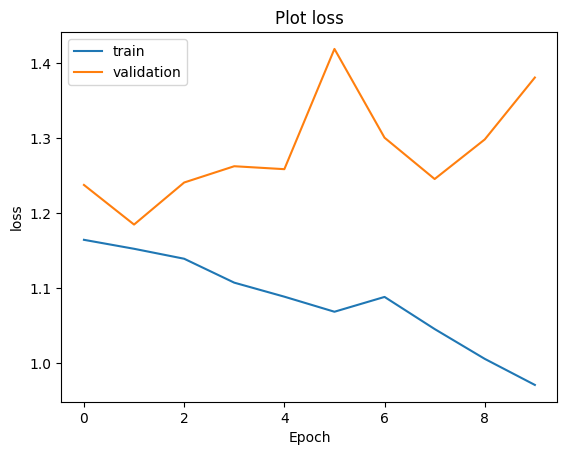

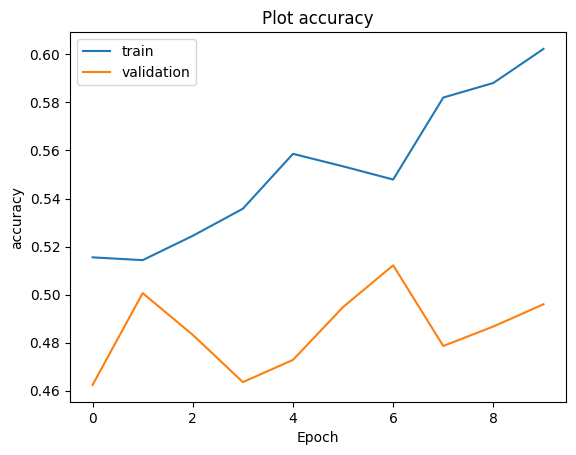

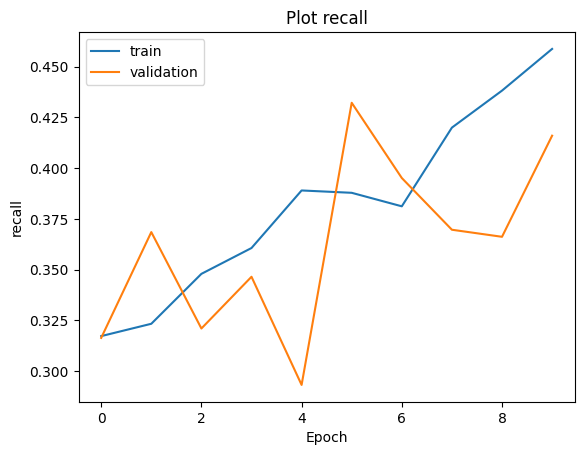

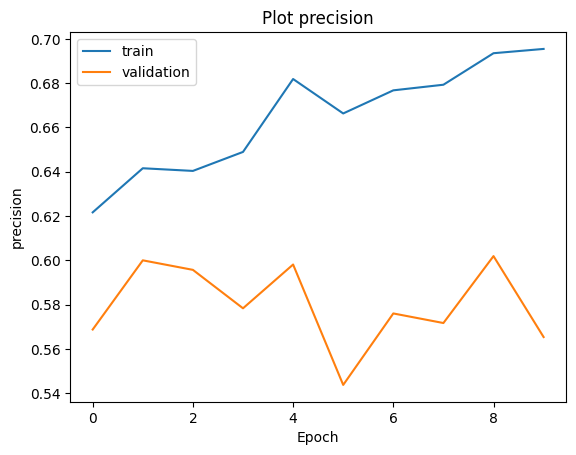

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hist, label):
  plt.plot(hist.history[label])
  plt.plot(hist.history['val_'+label])
  plt.title('Plot '+label)
  plt.ylabel(label)
  plt.xlabel('Epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

plot_history(history, 'loss')
plot_history(history, 'accuracy')
plot_history(history, 'recall')
plot_history(history, 'precision')

# 6. Testing

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('/content/gdrive/MyDrive/Computer_Vision/Code/modelCNN.h5')
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 14, 14, 256)       0         
                                                             

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.math import confusion_matrix

test_data = ImageDataGenerator()

test_ds = test_data.flow_from_directory(
    '/content/gdrive/MyDrive/Computer_Vision/Code/flowers/test',
    target_size=(width, height),
    batch_size = batchSize,
    class_mode = 'categorical'
)

class_names = []
for key, value in test_ds.class_indices.items():
  class_names.append(key)

predictions = np.array([])
labels = np.array([])

for x, y in test_ds:
  predictions = np.concatenate([predictions, np.argmax(loaded_model.predict(x), axis = -1)])
  labels = np.concatenate([labels, np.argmax(y, axis=-1)])

matrix = confusion_matrix(labels = labels, predictions = predictions).numpy()

df = pd.DataFrame(matrix, columns = class_names, index = class_names)
df

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 30ms/step


In [ ]:
import seaborn as sns
sns.heatmap(df, annot = True, fmt='d')